In [1]:
matplotlib inline

In [2]:
savefigs = True

# Gradiente Descendente (*Gradient Descent*)

Frequentemente, ao fazer ciência de dados, estamos tentando encontrar o melhor modelo para uma determinada situação. E geralmente "melhor" significará algo como "minimiza o erro do modelo" ou "maximiza a probabilidade dos dados". Em outras palavras, isso representará a solução para algum tipo de problema de otimização.

Isso significa que precisaremos resolver vários problemas de otimização. E, em particular, precisamos resolvê-los do zero. Nossa abordagem será uma técnica chamada gradiente descendente, que se presta muito bem a um tratamento do zero. Você pode não achar isso super excitante por si só, mas nos permitirá fazer coisas bem bacanas ao longo do curso, então tenha paciência comigo.

## A ideia por trás do gradiente descendente

Suponha que tenhamos alguma função `f` que tome como entrada um vetor de números reais e produza um único número real. Uma exemplo simples dessas funções é:

In [3]:
def sum_of_squares(v):
    """computes the sum of squared elements in v"""
    return sum(v_i ** 2 for v_i in v)

Com frequência, precisamos maximizar (ou minimizar) essas funções. Ou seja, precisamos encontrar a entrada `v` que produz o maior (ou menor) valor possível.

Para funções como a nossa, o gradiente (se você lembra do seu cálculo, este é o vetor de derivadas parciais) fornece a direção para a entrada na qual a função aumenta mais rapidamente. (Se você não se lembra do seu cálculo, aceite minha palavra ou procure na [Internet](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/gradient-and-directional-derivatives/v/gradient).)

Assim, uma abordagem para maximizar uma função é escolher um ponto de partida aleatório, calcular o gradiente, dar um pequeno passo na direção do gradiente (ou seja, a direção que faz com que a função aumente mais) e repetir com o novo ponto de partida. Da mesma forma, você pode tentar minimizar uma função dando pequenos passos na direção oposta.

Considere a simples função abaixo:

In [4]:
import sympy

#define symbolic vars, function
x,y=sympy.symbols('x y')
fun= x**2 + y**2
calcfun=sympy.lambdify([x,y],fun)

Que pode ser representada pelo gráfico abaixo:

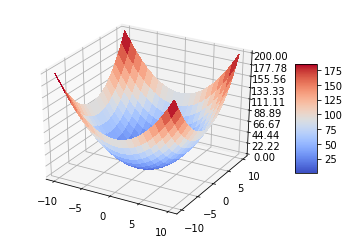

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

X,Y=np.meshgrid(np.arange(-10,11),np.arange(-10,11))
Z = calcfun(X,Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

if savefigs:
    fig.savefig('aula07-1.png', dpi=150)
plt.show()

Observe que essa função possui um ponto de mínimo nas coordenadas `(x=0, y=0)`. Além disso, a função aumenta à medida que os valores de `x` e `y` aumentam. O gradiente indica, para cada coordenada `(x,y)`, a direção `(dx, dy)` na qual `x` e `y` devem se mover (`x+dx, y+dy`) para que a função aumente o máximo possível. 

Abaixo é exibido o gradiente da função acima para pares de coordenadas `(x,y)`. Observe que o gradiente aumenta à medida que os valores de `x` e `y` aumenta, sempre apontando para a direção oposta à origem `(0,0)`. Outra forma de pensar nisso é a seguinte: se você está na coordenada `(x,y)` e pode andar apenas uma unidade (ou seja, somar um vetor de tamanho `1` à `[x,y]`), e se você quiser aumentar a função do máximo possível, ande na direção do gradiente.

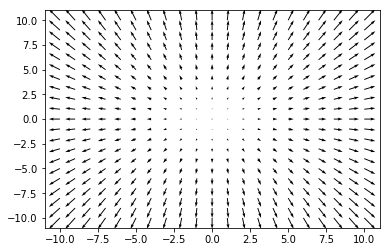

In [6]:
#take the gradient symbolically
gradfun=[sympy.diff(fun,var) for var in (x,y)]

#turn into a bivariate lambda for numpy
numgradfun=sympy.lambdify([x,y],gradfun)

X,Y=np.meshgrid(np.arange(-10,11),np.arange(-10,11))
graddat=numgradfun(X,Y)

fig = plt.figure()
plt.quiver(X,Y,graddat[0],graddat[1])
if savefigs:
    fig.savefig('aula07-2.png', dpi=150)
plt.show()



Se você quer encontrar o mínimo da função, então basta você ir na direção oposta ao gradiente, como mostra a figura abaixo:

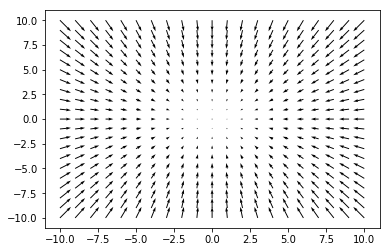

In [7]:
fig = plt.figure()
plt.quiver(X,Y,-graddat[0],-graddat[1])
if savefigs:
    fig.savefig('aula07-3.png', dpi=150)

plt.show()

Se uma função tiver um único mínimo global, é provável que esse procedimento o encontre. Se uma função tiver múltiplos mínimos (locais), este procedimento poderá "encontrar" um dos errados, e você poderá executar novamente o procedimento a partir de uma variedade de pontos de partida. Se uma função não tem um mínimo, então é possível que o procedimento continue indefinidamente.

## Estimando o gradiente

Se `f` é uma função de uma variável, sua derivada em um ponto `x` mede como `f(x)` muda quando fazemos uma pequena alteração em `x`. Ela é definida como o limite da diferença entre os quocientes `f(x + h)/h` e `f(x)/h`:

In [8]:
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

quando `h` se aproxima de `0`.

(Muitos estudantes de cálculo em potencial foram bloqueados pela definição matemática de limite. Aqui, vamos trapacear e simplesmente dizer que isso significa o que você acha que significa.)

A derivada é a inclinação da reta tangente em `(x, f(x))`, enquanto a diferença dos quocientes é a inclinação da linha não tangente que passa por `(x + h, f(x) + h)`. À medida que `h` fica menor e menor, a linha não tangente fica cada vez mais próxima da linha tangente:

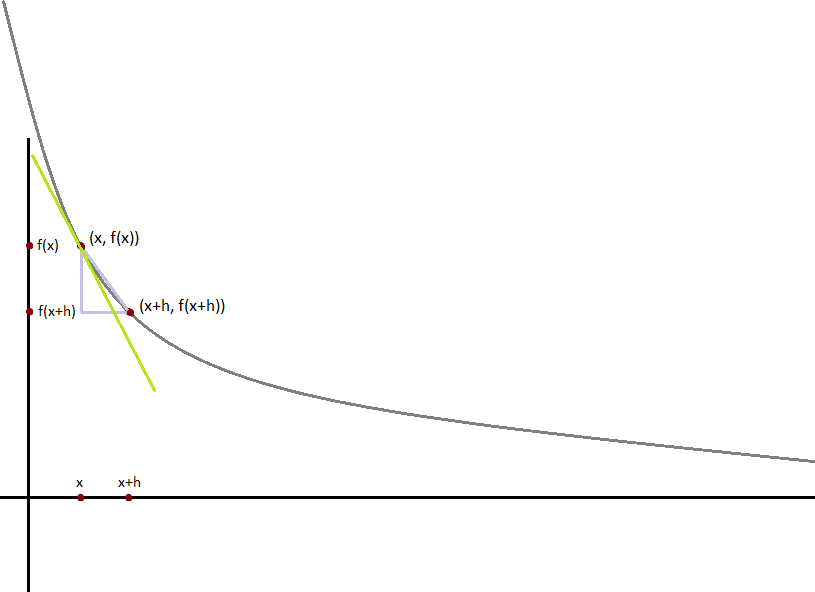

Para muitas funções, é fácil calcular as derivadas exatas. Por exemplo, a função `square`:

In [9]:
def square(x):
    return x * x

tem a seguinte derivada:

In [10]:
def derivative(x):
    return 2 * x

que você pode verificar - se você estiver inclinado - ao calcular explicitamente a diferença dos quocientes e tomar o limite.

E se você não pudesse (ou não quisesse) encontrar o gradiente? Embora não possamos ter limites no Python, podemos estimar derivadas avaliando a diferença dos quocientes para um `h` muito pequeno. Abaixo mostramos os resultados de uma dessas estimativas:

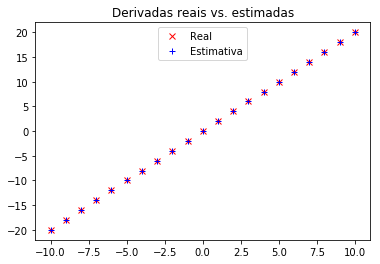

In [11]:
derivative_estimate = lambda x: difference_quotient(square, x, h=0.00001)

# plot to show they're basically the same
import matplotlib.pyplot as plt
x = np.arange(-10,11)
fig = plt.figure()
plt.title('Derivadas reais vs. estimadas')
plt.plot(x, derivative(x), 'rx', label='Real')           # red  x
plt.plot(x, derivative_estimate(x), 'b+', label='Estimativa')  # blue +
plt.legend(loc=9)
plt.show()        
if savefigs:
    fig.savefig('aula07-4.png', dpi=150)


Quando `f` é uma função de muitas variáveis, ela tem múltiplas derivadas parciais, cada uma indicando como `f` muda quando fazemos pequenas mudanças em apenas uma das variáveis de entrada e fixando todas as outras.

Assim, calculamos a i-ésima derivada parcial tratando-a como uma função com apenas a sua variável i, mantendo as outras variáveis fixas:

In [12]:
def partial_difference_quotient(f, v, i, h):

    # add h to just the i-th element of v
    w = [v_j + (h if j == i else 0)
         for j, v_j in enumerate(v)]

    return (f(w) - f(v)) / h

Podemos calcular o gradiente da mesma forma:

In [13]:
def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]

Uma grande desvantagem dessa abordagem de "estimar usando as diferenças dos quocientes" é que ela é computacionalmente cara. Se `v` tiver comprimento `n`, `estimate_gradient` deverá avaliar `f` em `2n` entradas diferentes (`f(x)` e `f(x+h)`). Se você está estimando repetidamente os gradientes, está fazendo muito trabalho extra.

## Usando o Gradiente

É fácil ver que a função `sum_of_squares` é menor quando sua entrada `v` é um vetor de zeros. Mas imagine que não sabíamos disso. Vamos usar gradientes para encontrar o mínimo entre todos os vetores tridimensionais. Escolheremos um ponto de partida aleatório e, em seguida, daremos pequenos passos na direção oposta do gradiente até chegarmos a um ponto em que o gradiente seja muito pequeno:

In [14]:
import random
from scipy.spatial import distance

def step(v, direction, step_size):
    """move step_size in the direction from v"""
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

# pick a random starting point
v = [random.randint(-10,10) for i in range(3)]

tolerance = 0.0000001

In [15]:
while True:
    gradient = sum_of_squares_gradient(v) # compute the gradient at v
    next_v = step(v, gradient, -0.01) # take a negative gradient step
    if distance.euclidean(next_v, v) < tolerance: # stop if we're converging
        break
    v = next_v # continue if we're not

print("minimo da funcao: ", v)

minimo da funcao:  [1.6313205201920195e-06, 4.350188053845385e-06, -1.6313205201920195e-06]


Você pode usar também a função `estimate_gradient`, caso não soubesse como calcular o gradiente da função que quer minimizar:

In [16]:
# pick a random starting point
v = [random.randint(-10,10) for i in range(3)]

tolerance = 0.0000001

In [17]:
while True:
    gradient = estimate_gradient(sum_of_squares, v)
    next_v = step(v, gradient, -0.01) # take a negative gradient step
    if distance.euclidean(next_v, v) < tolerance: # stop if we're converging
        break
    v = next_v # continue if we're not

print("minimo da funcao: ", v)

minimo da funcao:  [-5.692951700183114e-06, -1.4931038054866475e-07, -5.6929517001675635e-06]


Observe que sempre as duas execuções acima terminam com um `v` muito próximo de `[0,0,0]`. Quanto menor você fizer a tolerância, mais perto de `[0,0,0]` o valor de `v` ficará.

## Escolhendo o tamanho certo do passo

Embora o raciocínio para se mover na direção oposta ao gradiente seja claro, até que ponto mover-se não é. De fato, escolher o tamanho certo do passo que devemos nos mover é mais uma arte do que uma ciência. Opções populares incluem:

* Usar um tamanho de passo fixo;

* Diminuir gradualmente o tamanho do passo ao longo do tempo;

* Em cada etapa, escolha o tamanho do passo que minimiza o valor da função objetivo.

O último parece ótimo, mas é, na prática, um cálculo caro. Podemos aproximá-lo tentando uma variedade de tamanhos de passo e escolhendo aquele que resulta no menor valor da função objetivo:

In [18]:
step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

É possível que determinados tamanhos de passo resultem em entradas inválidas para nossa função. Por isso, precisamos criar uma função "safe apply" que retorna *infinito* (que nunca deve ser o mínimo de qualquer coisa) para entradas inválidas:

In [19]:
def safe(f):
    """return a new function that's the same as f,
    except that it outputs infinity whenever f produces an error"""
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            print("oops: ", args, "-", kwargs)
            return float('inf') # this means "infinity" in Python
    return safe_f

Abaixo um teste simples dessa função:

In [20]:
import math
try:
    print("tentativa #1: ", math.exp('bla'))
except:
    exp = safe(math.exp)
    print("tentativa #2: ", exp('bla'))

oops:  ('bla',) - {}
tentativa #2:  inf


## Juntando Tudo

No caso geral, temos algumas funções `target_fn` que queremos minimizar, e também temos suas gradientes `gradient_fn`. Por exemplo, a `target_fn` poderia representar os erros em um modelo como uma função de seus parâmetros, e podemos querer encontrar os parâmetros que tornam os erros tão pequenos quanto possível.

Digamos que, de alguma forma, tenhamos escolhido um valor inicial para os parâmetros `theta_0`. Então nós podemos implementar gradiente descendente como:

In [21]:
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    """use gradient descent to find theta that minimizes target function"""

    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    #step_sizes = [0.00001, 0.000001, 0.0000001, 0.00000001]

    theta = theta_0                 # set theta to initial value
    target_fn = safe(target_fn)     # safe version of target_fn
    value = target_fn(theta)        # value we're minimizing

    while True:
        gradient = gradient_fn(theta)
        print('gradient:', gradient)
        next_thetas = [step(theta, gradient, -step_size)
                       for step_size in step_sizes]
     
        # choose the one that minimizes the error function
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)
        print('theta and value:', next_theta, next_value)

        # stop if we're "converging"
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value

Nós o chamamos de `minimize_batch` porque, para cada passo de gradiente, ele olha para o conjunto de dados inteiro (porque `target_fn` retorna o erro sobre todo o conjunto de dados). Na próxima seção, veremos uma abordagem alternativa que analisa apenas um ponto de dados por vez.

## Exercício

Use o gradiente descendente para encontrar o mínimo da função `foo_f`, que corresponde a:

$f(x,y) = (x+3)^2 + xy + y^2$.

**Gabarito**: As coordenadas no ponto de mínimo são `[-4.0, 2]` e o valor mínimo é `-3`.

O gráfico dessa função é:

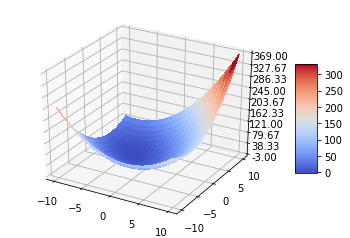

In [23]:
fig = plt.figure()
ax = fig.gca(projection='3d')

theta=np.meshgrid(np.arange(-10,11),np.arange(-10,11))
Z = foo_f(theta)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
if savefigs:
    fig.savefig('aula07-5.png', dpi=150)


## Maximizando uma função

Às vezes, queremos *maximizar* uma função. Nesse caso, podemos usar o gradiente descendente para minimizar o negativo da função (que tem um gradiente negativo correspondente):

In [25]:
def negate(f):
    """return a function that for any input x returns -f(x)"""
    return lambda *args, **kwargs: -f(*args, **kwargs)

def negate_all(f):
    """the same when f returns a list of numbers"""
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    return minimize_batch(negate(target_fn),
                          negate_all(gradient_fn),
                          theta_0,tolerance)

## Gradiente Descendente Estocástico

Como mencionamos anteriormente, muitas vezes usaremos o gradiente descendente para escolher os parâmetros de um modelo de maneira a minimizar alguma noção de erro. Usando a abordagem em lote anterior, cada etapa do método exige que façamos uma previsão e calculemos o gradiente para todo o conjunto de dados, o que faz com que cada etapa demore muito.

Geralmente, essas funções de erro são *aditivas*, o que significa que o erro preditivo em todo o conjunto de dados é simplesmente a soma dos erros preditivos para cada ponto de dados.

Quando este é o caso, podemos, em vez disso, aplicar uma técnica chamada gradiente descendente estocástico (ou *stochastic gradient descent*), que calcula o gradiente (e dá um passo) para apenas um ponto por vez. Ele passa sobre os dados repetidamente até atingir um ponto de parada.

Durante cada ciclo, queremos iterar nossos dados em uma ordem aleatória:

In [26]:
def in_random_order(data):
    """generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)]  # create a list of indexes
    random.shuffle(indexes)                    # shuffle them
    for i in indexes:                          # return the data in that order
        yield data[i]

E queremos dar um passo de gradiente para cada ponto de dados. Essa abordagem deixa a possibilidade de que poderemos circular um pouco para sempre, então, sempre que pararmos de melhorar, diminuiremos o tamanho do passo e, por fim, sairemos:

In [27]:
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.000001):

    data = list(zip(x, y))
    theta = theta_0                             # initial guess
    alpha = alpha_0                             # initial step size
    min_theta, min_value = None, float("inf")   # the minimum so far
    iterations_with_no_improvement = 0

    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data )
        
        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9

        # and take a gradient step for each of the data points
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = np.subtract(theta, np.multiply(alpha, gradient_i))
            #theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))

    return min_theta


A versão estocástica normalmente será muito mais rápida que a versão em lote. Claro, nós queremos uma versão que maximize também:

In [28]:
def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    return minimize_stochastic(negate(target_fn),
                               negate_all(gradient_fn),
                               x, y, theta_0, alpha_0)

## Para explorar

* Continue estudando! Usaremos a gradiente de descida para resolver problemas em todo o restante do curso.

* Neste ponto, você está, sem dúvida, cansado de mim recomendando que você leia livros didáticos. Se é um consolo, o [Active Calculus](https://scholarworks.gvsu.edu/books/10/) parece melhor do que os livros de cálculo que aprendi.

* `scikit-learn` tem um módulo de [gradiente descendente estocástico](http://scikit-learn.org/stable/modules/sgd.html) que não é tão geral quanto o nosso em alguns aspectos e mais geral de outras maneiras. Na verdade, na maioria das situações do mundo real, você estará usando bibliotecas nas quais a otimização já é cuidada nos bastidores, e você não precisará se preocupar com isso sozinho (a não ser quando não funcionar corretamente , que um dia, inevitavelmente, não vai).

## Exercício

Há indícios de que a largura e o comprimento dos focinhos de cangurus cinzentos australianos estão linearmente relacionados, ou seja, seja `x` o comprimento do focinho, a largura `y` seria dada por:

$$y = \theta_1x + \theta_2$$.

Neste exercício você deve encontrar os valores de $\theta$ que melhor explicam a relação entre `x` e `y`. Use dados reais de cangurus reportados no *Australian Journal of Zoology, Vol. 28, p607-613*, que podem ser baixados [aqui](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr07.html). Além disso, para encontrar os melhores valores de $\theta$, use os procedimentos `minimize_stochastic` (gradiente descendente estocástico) e `minimize_batch`. Compare os seus desempenhos. Por fim, plote um gráfico de dispersão (scatter plot) com os dados dos cangurus e a reta que melhor os explica.

**Gabarito**: os coeficientes $(\theta_1, \theta_2)$ têm os seguintes valores: `[0.2876, 46.4508]`.

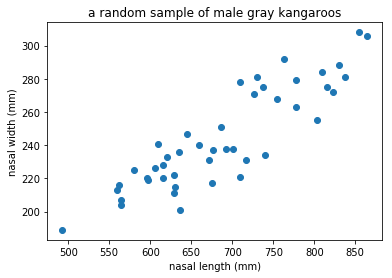

In [29]:
import csv
#with open('data/gray-kangoroos.csv', newline='') as csvfile:
#    spamreader = csv.reader(csvfile, delimiter=',')
#    for row in spamreader:
#        print(', '.join(row))

X = list()
Y = list()
with open('gray-kangoroos.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        #print(row['X'], row['Y'])
        X.append(int(row['X']))
        Y.append(int(row['Y']))
        
plt.scatter(X, Y)


#Reference: Australian Journal of Zoology, Vol. 28, p607-613
#http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr07.html
plt.title("a random sample of male gray kangaroos")
plt.xlabel("nasal length (mm)")
plt.ylabel("nasal width (mm)")
plt.show()        